#US Airline Sentiment Analysis from Twitter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Tweets.csv',encoding='latin-1', delimiter=',')

In [ ]:
df.head(50)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [ ]:
print(len(df[df['airline_sentiment_confidence'] <=0.8]))

4181


In [ ]:
df = df[df['airline_sentiment_confidence'] >=0.8]
df = df.reset_index()

df.shape

(10459, 16)

In [ ]:
df=df.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold',
                'name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              10459 non-null  int64 
 1   airline_sentiment  10459 non-null  object
 2   text               10459 non-null  object
 3   text_lemm          10459 non-null  object
 4   sentiment          10459 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 408.7+ KB


In [ ]:
df.head()


,index,airline_sentiment,text,text_lemm,sentiment
0,0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,1
1,3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
2,4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seat ...,0
4,9,positive,"@VirginAmerica it was amazing, and arrived an ...",virginamerica amazing arrived hour early good,2


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
df['sentiment']=df['airline_sentiment'].map({'neutral':1,'negative':0,'positive':2})
df.head(10)

,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_lemm,sentiment
0,0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,1
1,3,570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,0
2,4,570300817074462722,negative,1.0,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,0
3,5,570300767074181121,negative,1.0,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),virginamerica seriously would pay flight seat ...,0
4,9,570295459631263746,positive,1.0,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),virginamerica amazing arrived hour early good,2
5,11,570289724453216256,positive,1.0,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York,virginamerica lt pretty graphic much better mi...,2
6,12,570289584061480960,positive,1.0,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica This is such a great deal! Alre...,NaN,2015-02-24 10:30:06 -0800,NYC,America/New_York,virginamerica great deal already thinking nd t...,2
7,14,570285904809598977,positive,1.0,NaN,NaN,Virgin America,NaN,sjespers,NaN,0,@VirginAmerica Thanks!,NaN,2015-02-24 10:15:29 -0800,"San Francisco, CA",Pacific Time (US & Canada),virginamerica thanks,2
8,16,570277724385734656,positive,1.0,NaN,NaN,Virgin America,NaN,ItzBrianHunty,NaN,0,@VirginAmerica So excited for my first cross c...,NaN,2015-02-24 09:42:59 -0800,west covina,Pacific Time (US & Canada),virginamerica excited first cross country flig...,2
9,17,570276917301137409,negative,1.0,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada),virginamerica flew nyc sfo last week fully sit...,0


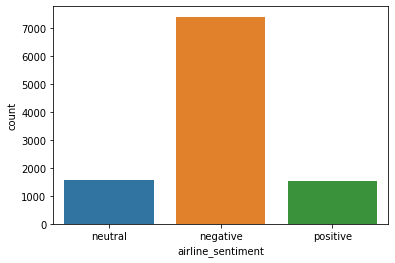

In [ ]:
df['airline_sentiment'].value_counts()
sns.countplot(x='airline_sentiment',data=df)

In [ ]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Lemmatization & removing stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
text_lemm = []
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text_lemm.append(review)

In [ ]:
print(text_lemm)

['virginamerica dhepburn said', 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse', 'virginamerica really big bad thing', 'virginamerica seriously would pay flight seat playing really bad thing flying va', 'virginamerica amazing arrived hour early good', 'virginamerica lt pretty graphic much better minimal iconography', 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p', 'virginamerica thanks', 'virginamerica excited first cross country flight lax mco heard nothing great thing virgin america daystogo', 'virginamerica flew nyc sfo last week fully sit seat due two large gentleman either side help', 'flying virginamerica', 'virginamerica know would amazingly awesome bos fll please want fly', 'virginamerica love graphic http co ut grrwaaa', 'virginamerica love hipster innovation feel good brand', 'virginamerica making bos gt la non stop permanently anytime soon', 'virginamerica guy messed seating reserved se

In [ ]:
df['text_lemm']=pd.Series(text_lemm)
df.head()

,index,airline_sentiment,text,text_lemm,sentiment
0,0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,1
1,3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
2,4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seat ...,0
4,9,positive,"@VirginAmerica it was amazing, and arrived an ...",virginamerica amazing arrived hour early good,2


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X=vect.fit_transform(df.text_lemm)
print(sorted(vect.vocabulary_))
print(X.shape)
print(X.toarray())

['aa', 'aaaand', 'aaadvantage', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abc', 'abcnetwork', 'abcnews', 'abducted', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abq', 'abroad', 'absolute', 'absolutely', 'absorber', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accompaniment', 'accompany', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accruing', 'acct', 'accumulation', 'accurate', 'accused', 'acebo', 'achieve', 'achieves', 'achieving', 'ack', 'acknowledge', 'acknowledgement', 'acknow

In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(df['text_lemm'])
print(vect.get_feature_names())
print(tfidf_matrix.shape)
df1= pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
df1.head()

['aa', 'aaaand', 'aaadvantage', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abc', 'abcnetwork', 'abcnews', 'abducted', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abq', 'abroad', 'absolute', 'absolutely', 'absorber', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accompaniment', 'accompany', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accruing', 'acct', 'accumulation', 'accurate', 'accused', 'acebo', 'achieve', 'achieves', 'achieving', 'ack', 'acknowledge', 'acknowledgement', 'acknow

,aa,aaaand,aaadvantage,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aakjumxa,aal,aaron,aarp,aateam,aau,aavvoreph,aback,abandon,abandoned,abandonment,abassinet,abc,abcnetwork,abcnews,abducted,ability,able,aboard,aboout,abounds,abq,abroad,absolute,absolutely,absorber,absurd,absurdity,absurdly,abt,abtwf,...,zfroinpszi,zfv,zgoqoxjbqy,zgw,zhmfdiw,zi,zik,zip,zipper,zira,zj,zkatcher,zkoe,zlsquu,zlzmk,zombie,zone,zoom,zouowgv,zpjr,zpu,zpz,zr,zrh,zsdgzydnde,zsuztnaijq,zt,ztua,zukes,zurich,zut,zv,zvugmkjw,zwzc,zxzn,zy,zygjs,zz,zza,zzkqwwbjz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,df.sentiment,test_size = 0.20 , random_state = 0)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
models={LinearSVC(),LogisticRegression(),MultinomialNB()}
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  #print(round(accuracy_score(y_test,y_pred)*100,2))
  print("{} : accuracy_score: {}%".format(model,round(accuracy_score(y_test,y_pred)*100,2)))
  print("\n\n",confusion_matrix(y_test,y_pred))
  print(classification_report(y_test, y_pred))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) : accuracy_score: 85.47%


 [[1412   52   18]
 [ 151  165   18]
 [  49   16  211]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1482
           1       0.71      0.49      0.58       334
           2       0.85      0.76      0.81       276

    accuracy                           0.85      2092
   macro avg       0.81      0.74      0.77      2092
weighted avg       0.85      0.85      0.85      2092

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) : accuracy_score: 74.95%


 [[1480    1    1]
 [ 297   35    2]
 [ 221    2   53]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1482
           1       0.92      0.10      0.19       334
 